# Nuestra primera red neuronal.

Vamos a realizar el ejemplo de la red neuronal que mencionó el profesor en clase.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
x1 = np.array([0.1,0.3,0.1,0.6,0.4,0.6,0.5,0.9,0.4,0.7]).reshape(-1,1)

In [ ]:
x2 = np.array([0.1,0.4,0.5,0.9,0.2,0.3,0.6,0.2,0.4,0.6]).reshape(-1,1)

In [ ]:
y = np.array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
np.argmax(y, axis=1)

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [ ]:
def mapa_colores(y):
    etiquetas = np.argmax(y,axis=1)
    col = []
    for i in etiquetas:
        if i==0:
            col.append("red")
        else:
            col.append("green")
    return col 
            

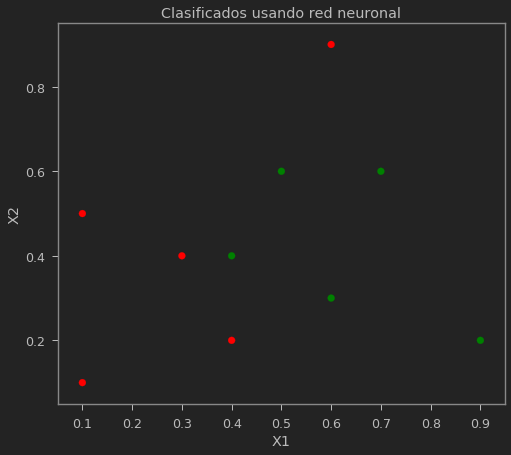

In [ ]:
plt.scatter(x1.ravel(),x2.ravel(), c= mapa_colores(y))
plt.title("Clasificados usando red neuronal")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [ ]:
x_ones = np.ones((x1.shape[0],1))

In [ ]:
x_ones.shape

(10, 1)

In [ ]:
X = np.concatenate((x1,x2,x_ones), axis = 1)

In [ ]:
X 

array([[0.1, 0.1, 1. ],
       [0.3, 0.4, 1. ],
       [0.1, 0.5, 1. ],
       [0.6, 0.9, 1. ],
       [0.4, 0.2, 1. ],
       [0.6, 0.3, 1. ],
       [0.5, 0.6, 1. ],
       [0.9, 0.2, 1. ],
       [0.4, 0.4, 1. ],
       [0.7, 0.6, 1. ]])

El objetivo consiste en encontrar una clasificador que nos diga, para cada punto del espacio, si le corresponde color "rojo" o "verde", a partir de unos datos de los cuales sabemos que color les corresponde.

En este caso utilizaremos las siguientes etiquetas:

Rojo: [1,0]

Verde: [0,1]

Este tipo de etiquetas se utilizan mucho en problemas de clasificación multiclase, en donde el índice de la entrada con valor 1 representa a que clase pertenece el resultado.

Para resolver este problema vamos a realizar una red neuronal con la siguiente estructura:


![](nn_example.svg)

En cada capa la función de activación será la siguiente:
$$\rho:\mathbb{R}\rightarrow \mathbb{R}$$
$$\rho(x)= \frac{1}{1+e^{-x}}$$

## Backpropagation

El algoritmo de backpropagation es ampliamente utilizado en el entrenamiento de redes neuronales supervisadas. Consiste en encontrar el gradiente de la función de costo, con respecto a los pesos de cada capa y una vez teniendo ese gradiente se puede aplicar la iteración para el optimizador que se vaya a usar (la mayoría de los optimizadores utilizan el gradiente).

Introduzcamos un poco de notación:
$$a^{[0]} = X$$
$$z^{[l]} = T_l(a^{[l-1]})$$
$$a^{[l]} = \rho\left(z^{[l]}\right)$$

Las transformaciones afines son de la forma:
$$T(x) = Wx + b$$
Si la función de costo es la MSE (error cuadrático medio):
$$C(x) = \sum_{i=1}^n \frac{1}{2}||\hat{y}-y||^2$$

donde $y$ son las etiquetas y $\hat{y}$ las predicciones,
entonces las derivadas quedan de la siguiente forma:

$$\delta^{[L]}=\rho^{\prime}\left(z^{[L]}\right)*\left(a^{[L]}-y\right)$$

$$\delta^{[l]}=\rho^{\prime}\left(z^{[l]}\right)*\left(\left(W^{[l+1]}\right)^T \delta^{[l+1]}\right)$$

$$\frac{\partial C}{\partial b_j^{[l]}}= \delta^{[l]}$$

$$\frac{\partial C}{\partial W_{jk}^{[l]}} = \delta_j^{[l]}a_k^{[l-1]}$$

Si las transformaciones las aplicamos de la siguiente forma:
$$T(x) = xW+b$$
las derivadas resultantes son:
$$\delta^{[L]}=\rho^{\prime}\left(z^{[L]}\right)*\left(a^{[L]}-y\right)$$

$$\delta^{[l]}=\rho^{\prime}\left(z^{[l]}\right)*\left( \delta^{[l+1]}\left(W^{[l+1]}\right)^T\right)$$

$$\frac{\partial C}{\partial b_j^{[l]}} = \delta^{[l]}$$

$$\frac{\partial C}{\partial W_{jk}^{[l]}} = \left(a^{[l-1]}\right)_j^T\delta_k^{[l]}$$

(El símbolo "$*$" denota multiplicación entrada a entrada)


Lo anterior es para cuando la entrada $x$ es un solo dato. De forma matricial, cuando la entrada $X$ es una matriz en $M(\mathbb{R})_{n\times p}$

Si las transformaciones las aplicamos de la siguiente forma:
$$T(x) = XW$$
las derivadas resultantes son:
$$\delta^{[L]}=\rho^{\prime}\left(z^{[L]}\right)*\left(a^{[L]}-y\right)$$

$$\delta^{[l]}=\rho^{\prime}\left(z^{[l]}\right)*\left( \delta^{[l+1]}\left(W^{[l+1]}\right)^T\right)$$

$$\frac{\partial C}{\partial W^{[l]}} = \left(a^{[l-1]}\right)^T\delta^{[l]}$$

(El símbolo "$*$" denota multiplicación entrada a entrada)

en este caso $\rho = \frac{1}{1+e^{-x}}$ y su derivada es $\rho^{\prime}=\rho(1-\rho)$

Ya con los gradientes, se puede realizar la iteración o paso del optimizador que vayas a utilizar para minimizar la función de costo. Para este ejemplo utilizaremos el "Descenso del gradiente", por lo que:

$$W^{[l]}_n = W^{[l]}_{n-1}-\alpha\frac{\partial C}{\partial W^{[l]}_{n-1}}$$

$$b^{[l]}_n = b^{[l]}_{n-1}-\alpha\frac{\partial C}{\partial b^{[l]}_{n-1}}$$

## Comencemos

In [ ]:
lr = 0.05
iteraciones = 100000

In [ ]:
np.random.seed(0)
W1 = np.random.rand(3,2)
W2 = np.random.rand(2,3)
W3 = np.random.rand(3,2)

In [ ]:
def sigmoide(x):
    return 1/(1+np.exp(-x))

In [ ]:
for i in range(iteraciones):
    a_1 = sigmoide(X@W1)
    a_2 = sigmoide(a_1@W2)
    a_3 = sigmoide(a_2@W3)
    
    #z_1 = X@W1
    #z_2 = a1@W2
    #z_3 = a2@W3
    
    delta_3 = a_3*(1-a_3)*(a_3-y)
    delta_2 = a_2*(1-a_2)*(delta_3@W3.T)
    delta_1 = a_1*(1-a_1)*(delta_2@W2.T)
    
    #Paso del gradiente
    W1 = W1-lr*(X.T@delta_1)
    W2 = W2-lr*(a_1.T@delta_2)
    W3 = W3-lr*(a_2.T@delta_3)
    
    

In [ ]:
W1

array([[  5.72513149,  -7.0708451 ],
       [-13.26980531,  -6.39024792],
       [  4.93113504,   4.74365024]])

In [ ]:
W2

array([[-6.91534763,  3.21887228,  4.77017627],
       [11.54840496, -1.46454666, -5.8641505 ]])

In [ ]:
W3

array([[ 14.76987774, -14.69809698],
       [ -1.70893592,   1.28025466],
       [ -4.63560112,   5.04070935]])

In [ ]:
a_1 = sigmoide(X@W1)
a_2 = sigmoide(a_1@W2)
a_3 = sigmoide(a_2@W3)

In [ ]:
a_3

array([[9.99992927e-01, 5.88675089e-06],
       [9.89267298e-01, 1.02359105e-02],
       [9.99998940e-01, 9.61736547e-07],
       [9.73198413e-01, 2.74157131e-02],
       [9.93802343e-01, 5.88498929e-03],
       [2.53069300e-03, 9.97440176e-01],
       [1.63933619e-02, 9.83782075e-01],
       [2.03773915e-03, 9.97941225e-01],
       [1.79925224e-02, 9.81666003e-01],
       [2.68348342e-03, 9.97322003e-01]])

In [ ]:
y 

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [ ]:
dominio = np.linspace(0,1,1000)

In [ ]:
X_D,Y_D = np.meshgrid(dominio,dominio)

In [ ]:
X_D

array([[0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ],
       [0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ],
       [0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ],
       ...,
       [0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ],
       [0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ],
       [0.      , 0.001001, 0.002002, ..., 0.997998, 0.998999, 1.      ]])

In [ ]:
X_DATOS = np.concatenate((X_D.ravel().reshape(-1,1),Y_D.ravel().reshape(-1,1), np.ones((1000000,1))), axis = 1)

In [ ]:
X_DATOS.shape

(1000000, 3)

In [ ]:
X_DATOS

array([[0.      , 0.      , 1.      ],
       [0.001001, 0.      , 1.      ],
       [0.002002, 0.      , 1.      ],
       ...,
       [0.997998, 1.      , 1.      ],
       [0.998999, 1.      , 1.      ],
       [1.      , 1.      , 1.      ]])

In [ ]:
a1 = sigmoide(X_DATOS@W1)
a2 = sigmoide(a1@W2)
a3 = sigmoide(a2@W3)

In [ ]:
a3

array([[9.99993785e-01, 5.13509252e-06],
       [9.99993780e-01, 5.13872022e-06],
       [9.99993776e-01, 5.14236117e-06],
       ...,
       [8.87329594e-01, 1.15191651e-01],
       [8.86199784e-01, 1.16343913e-01],
       [8.85055080e-01, 1.17511301e-01]])

In [ ]:
Z = np.argmax(a3, axis = 1)

In [ ]:
Z = Z.reshape(1000,1000)

In [ ]:
from matplotlib.colors import ListedColormap

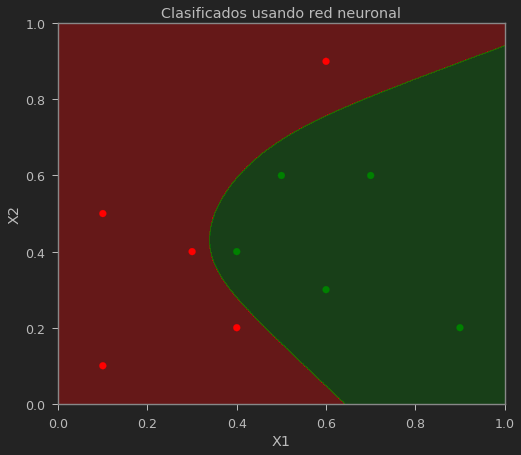

In [ ]:
plt.scatter(x1.ravel(),x2.ravel(), c= mapa_colores(y))
plt.contourf(X_D,Y_D,Z, alpha=0.3, cmap=ListedColormap(("red","green")))
plt.title("Clasificados usando red neuronal")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

# Recreando la red neuronal con pytorch

# Vamos a recrear la red neuronal utilizando pytorch desde cero.

In [1]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1782762)

![](nn_example.svg)

In [2]:
W1_t = torch.randn((2,2), requires_grad = True, dtype=torch.float64)
b1 = torch.randn((1,2), requires_grad = True, dtype=torch.float64)

In [3]:
W2_t = torch.randn((2,3), requires_grad = True, dtype=torch.float64)
b2 = torch.randn((1,3), requires_grad = True, dtype=torch.float64)

In [4]:
W3_t = torch.randn((3,2), requires_grad = True, dtype=torch.float64)
b3 = torch.randn((1,2), requires_grad = True, dtype=torch.float64)

In [5]:
W1_t

tensor([[ 1.1068,  0.4760],
        [ 0.2992, -0.0944]], dtype=torch.float64, requires_grad=True)

In [6]:
b1 

tensor([[ 0.6482, -0.5561]], dtype=torch.float64, requires_grad=True)

In [7]:
W1_t + b1 

tensor([[ 1.7550, -0.0801],
        [ 0.9475, -0.6505]], dtype=torch.float64, grad_fn=<AddBackward0>)

In [8]:
F.sigmoid(W1_t)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


tensor([[0.7515, 0.6168],
        [0.5743, 0.4764]], dtype=torch.float64, grad_fn=<SigmoidBackward0>)

In [9]:
torch.sigmoid(W1_t)

tensor([[0.7515, 0.6168],
        [0.5743, 0.4764]], dtype=torch.float64, grad_fn=<SigmoidBackward0>)

In [10]:
torch.exp(W1_t)

tensor([[3.0246, 1.6096],
        [1.3488, 0.9099]], dtype=torch.float64, grad_fn=<ExpBackward0>)

In [11]:
X 

NameError: ignored

In [ ]:
X_t = torch.tensor(X[:,[0,1]])

In [ ]:
X_t

In [ ]:
def sig(x):
    return 1/(1+torch.exp(-x))

In [ ]:
sig(W1_t)

In [ ]:
def forward(X):
    c1 = torch.sigmoid(X@W1_t + b1)
    c2 = torch.sigmoid(c1@W2_t + b2)
    c3 = torch.sigmoid(c2@W3_t + b3)
    return c3 

In [ ]:
forward(X_t)

In [ ]:
def costo(y_true,y_pred):
    return 0.5*((y_true-y_pred)**2).sum()

In [ ]:
y 

In [ ]:
y_t = torch.tensor(y, dtype=torch.float64)

In [ ]:
y_t

In [ ]:
costo(y_t,forward(X_t))

In [ ]:
j=0

In [ ]:
for i in range(100000):
    salida = forward(X_t)
    error = costo(y_t,salida)
    error.backward()
    #Ya tenemos los gradientes guardados en las matrices de pesos, ahora necesitamos
    #hacer el paso del gradiente
    
    with torch.no_grad():
        W1_t.data -= lr*W1_t.grad
        W2_t.data -= lr*W2_t.grad
        W3_t.data -= lr*W3_t.grad
        b1.data -= lr*b1.grad
        b2.data -= lr*b2.grad
        b3.data -= lr*b3.grad
        
    W1_t.grad.zero_()
    W2_t.grad.zero_()
    W3_t.grad.zero_()
    b1.grad.zero_()
    b2.grad.zero_()
    b3.grad.zero_()
    print(j)
        

In [ ]:
W1_t

In [ ]:
W1_t.data

In [ ]:
salida_prueba = forward(X_t)

In [ ]:
salida_prueba

In [ ]:
X_graf = torch.tensor(X_DATOS[:,[0,1]], dtype=torch.float64)

In [ ]:
salida_graf = forward(X_graf)

In [ ]:
salida_graf.shape

In [ ]:
sg = np.array(salida_graf.detach())

In [ ]:
pred_graf = np.argmax(sg, axis = 1) 

In [ ]:
sum(pred_graf)

In [ ]:
Z_2 = pred_graf.reshape(1000,1000)

In [ ]:
salida_graf = salida_graf.reshape(1000,1000)

In [ ]:
plt.scatter(x1.ravel(),x2.ravel(), c= mapa_colores(y))
plt.contourf(X_D,Y_D,Z_2, alpha=0.3, cmap=ListedColormap(("red","green")))
plt.title("Clasificados usando red neuronal")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [ ]:
plt.scatter(x1.ravel(),x2.ravel(), c= mapa_colores(y))
plt.contourf(X_D,Y_D,Z, alpha=0.3, cmap=ListedColormap(("red","green")))
plt.title("Clasificados usando red neuronal")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()